In [3]:

import pandas as pd
import folium
import json
df = pd.read_csv('./시군구.csv')


m = folium.Map(location=[36.5, 127.5], zoom_start=7)

for index, row in df.iterrows():
    name = row['시군구']
    coordinates = [row['위도(x)'], row['경도(y)']]
    risk_class = row['지방소멸위험분류']
    
    color = 'green' if risk_class == 1 else 'green' if risk_class == 2 else 'yellow' if risk_class == 3 else 'orange' if risk_class == 4 else 'red'
    
    folium.CircleMarker(
        location=coordinates,
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=f'{name} (Risk Class: {risk_class})'
    ).add_to(m)


m.save('region_risk_map.html')


In [24]:


# Load your GeoJSON data
with open('1.json', 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Create a Folium map
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

def style_function(feature):
    risk_class = row['지방소멸위험분류']
    color_dict = {
        1: 'green',
        2: 'green',
        3: 'yellow',
        4: 'orange',
        5: 'red'
    }
    color = color_dict.get(risk_class, 'gray')  # Default to gray for unknown risk classes
    return {
        'fillColor': color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

# Create a GeoJson layer and add it to the map
folium.GeoJson(
    geojson_data,
    name='City, County, District Boundaries',
    style_function=style_function,
    highlight_function=lambda x: {'weight': 3, 'fillOpacity': 1},
    tooltip=folium.GeoJsonTooltip(fields=['name', '지방소멸위험분류'], labels=True, sticky=True)
).add_to(m)

# Save the map to an HTML file
m.save('city_county_district_map.html')

AssertionError: The field name is not available in the data. Choose from: ('CTPRVN_CD', 'CTP_ENG_NM', 'CTP_KOR_NM').

In [2]:

import pandas as pd
import folium

# 데이터를 불러옵니다. (여기에서는 데이터프레임을 직접 생성합니다.)
data = {
    '시군구': ['시군구1', '시군구2', '시군구3', '시군구4'],
    '위도(x)': [36.5, 36.6, 36.7, 36.8],
    '경도(y)': [127.5, 127.6, 127.7, 127.8],
    '지방소멸위험분류': [1, 2, 3, 4]
}

df = pd.DataFrame(data)

# colormap 설정
colormap = {
    1: 'green',
    2: 'green',
    3: 'yellow',
    4: 'orange'
}

def get_marker_color(risk_class):
    return colormap.get(risk_class, 'red')

m = folium.Map(location=[36.5, 127.5], zoom_start=7)

for index, row in df.iterrows():
    name = row['시군구']
    coordinates = [row['위도(x)'], row['경도(y)']]
    risk_class = row['지방소멸위험분류']
    
    color = get_marker_color(risk_class)
    
    folium.CircleMarker(
        location=coordinates,
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=f'{name} (Risk Class: {risk_class})'
    ).add_to(m)

m.save('region_risk_map.html')

In [14]:
import pandas as pd
import folium
import webbrowser
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = '1.json'
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
state_unemployment = '시군구.csv'
state_data = pd.read_csv(state_unemployment)
 
# Initialize the map:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)
 
# Add the color for the chloropleth:

m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['Code', 'Population'],
 key_on='feature.properties.SIG_CD',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.5,
 legend_name='Population Rate (%)'
)

folium.LayerControl().add_to(m)
 
# Save to html
m.save('folium_kr.html')
webbrowser.open_new("folium_kr.html")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


KeyError: "None of ['Code'] are in the columns"

In [12]:
# Load your GeoJSON data
with open('1.json', 'r') as f:
    geojson_data = json.load(f)

# Create a Folium map centered at a specific location
m = folium.Map(location=[36.5, 127.5], zoom_start=7)
def style_function(feature):
    risk = feature['properties']['지방소멸위험분류']
    color = 'green' if risk <= 0.1 else 'yellow' if risk <= 0.2 else 'orange' if risk <= 0.3 else 'red'
    return {
        'fillColor': color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

folium.GeoJson(
    geojson_data,
    name='Population Extinction Risk',
    style_function=style_function,
    highlight_function=lambda x: {'weight': 3, 'fillOpacity': 1},
    tooltip=folium.GeoJsonTooltip(fields=['City/county/gu', 'Local extinction risk index'], labels=True, sticky=True)
).add_to(m)

KeyError: '지방소멸위험분류'

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47736 (\N{HANGUL SYLLABLE MYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/I

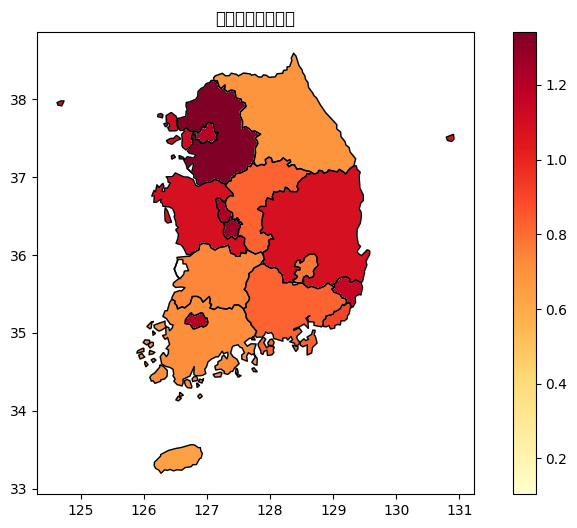

In [55]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# GeoJSON 파일 불러오기
gdf = gpd.read_file('SIDO_MAP_2022.json')

# CSV 파일 불러오기 (예: 'region_data.csv' 파일에는 'region_name' 및 'indicator' 열이 있다고 가정)
df = pd.read_csv('시군구.csv')

# 데이터 병합 (예: 'region_name' 열을 기준으로 병합)
merged_data = gdf.merge(df, left_on='CTP_KOR_NM', right_on='CTP_KOR_NM', how='left')

# 플롯 설정
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.boundary.plot(ax=ax, linewidth=1, color='black')  # 지역 경계 그리기

# 데이터를 기반으로 한 단계구분도 그리기
merged_data.plot(column='지방소멸위험지수', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# 플롯 제목 설정
plt.title('지방소멸위험지수')

# 플롯 표시
plt.show()

In [56]:
merged_data

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry,시도코드,SIG_KOR_NM,SIG_KO,시점,총인구,20-39세 여성인구,65세 이상 인구,지방소멸위험지수,지방소멸위험분류,위도(x),경도(y)
0,11,Seoul,서울특별시,"POLYGON ((126.98400 37.63600, 126.94800 37.657...",11,11320,도봉구,202302,"310,853","37,928","67,701",0.560,3,37.6688,127.0471
1,11,Seoul,서울특별시,"POLYGON ((126.98400 37.63600, 126.94800 37.657...",11,11305,강북구,202302,"293,119","37,359","66,602",0.561,3,37.6396,127.0257
2,11,Seoul,서울특별시,"POLYGON ((126.98400 37.63600, 126.94800 37.657...",11,11350,노원구,202302,"502,820","63,798","92,747",0.688,3,37.6550,127.0778
3,11,Seoul,서울특별시,"POLYGON ((126.98400 37.63600, 126.94800 37.657...",11,11260,중랑구,202302,"385,129","54,850","75,529",0.726,3,37.6065,127.0927
4,11,Seoul,서울특별시,"POLYGON ((126.98400 37.63600, 126.94800 37.657...",11,11470,양천구,202302,"440,042","53,908","72,936",0.739,3,37.5271,126.8561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,48,Gyeongsangnam-do,경상남도,"MULTIPOLYGON (((128.35100 34.84100, 128.40700 ...",48,48120,창원시,202302,"1,018,699","108,738","172,005",0.632,3,35.2372,128.6811
224,48,Gyeongsangnam-do,경상남도,"MULTIPOLYGON (((128.35100 34.84100, 128.40700 ...",48,48330,양산시,202302,"353,744","38,465","56,268",0.684,3,35.3381,129.0267
225,48,Gyeongsangnam-do,경상남도,"MULTIPOLYGON (((128.35100 34.84100, 128.40700 ...",48,48310,거제시,202302,"235,638","22,591","31,593",0.715,3,34.8882,128.6100
226,48,Gyeongsangnam-do,경상남도,"MULTIPOLYGON (((128.35100 34.84100, 128.40700 ...",48,48250,김해시,202302,"534,212","58,511","70,985",0.824,3,35.2279,128.8738


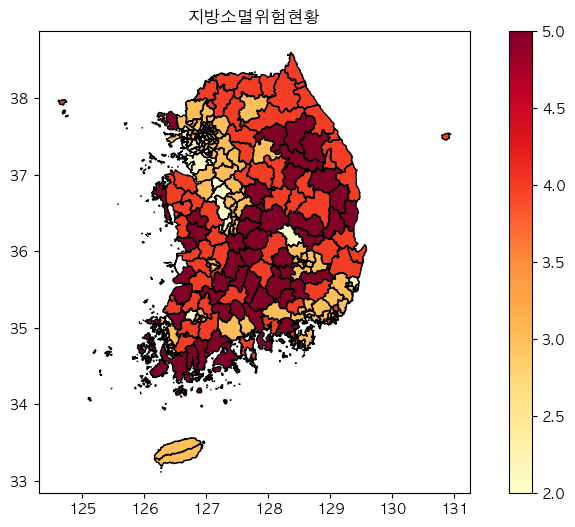

In [101]:
plt.rc('font', family='AppleGothic') #맥
gdf = gpd.read_file('11.json')

# # CSV 파일 불러오기 (예: 'region_data.csv' 파일에는 'region_name' 및 'indicator' 열이 있다고 가정)
df = pd.read_csv('시군구.csv')
df['SIG_CD']=df['SIG_CD'].astype('str') 
# # 데이터 병합 (예: 'region_name' 열을 기준으로 병합)
merged_data = gdf.merge(df, left_on='SIG_CD', right_on='SIG_CD', how='left')


# # 플롯 설정
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

gdf.boundary.plot(ax=ax, linewidth=1, color='black')  # 지역 경계 그리기

# # 데이터를 기반으로 한 단계구분도 그리기
merged_data.plot(column='지방소멸위험분류', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# # 플롯 제목 설정
plt.title('지방소멸위험현황')




# # 플롯 표시
plt.show()

In [73]:
merged_data

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,시도코드,CTP_KOR_NM,시군구,시점,총인구,20-39세 여성인구,65세 이상 인구,지방소멸위험지수,지방소멸위험분류,위도(x),경도(y)
0,11110,Jongno-gu,���α�,"POLYGON ((127.01200 37.58200, 127.01500 37.582...",11.0,서울특별시,종로구,202302.0,"141,433","21,314","27,878",0.765,3.0,37.5729,126.9794
1,11140,Jung-gu,중구,"POLYGON ((127.02300 37.57200, 127.02400 37.567...",11.0,서울특별시,중구,202302.0,"120,555","19,370","24,786",0.781,3.0,37.5641,126.9970
2,11170,Yongsan-gu,��걸,"POLYGON ((126.96900 37.55600, 126.97600 37.553...",11.0,서울특별시,용산구,202302.0,"218,175","35,950","38,729",0.928,3.0,37.5311,126.9814
3,11200,Seongdong-gu,������,"POLYGON ((127.07200 37.56000, 127.07400 37.559...",11.0,서울특별시,성동구,202302.0,"280,474","44,578","47,851",0.932,3.0,37.5509,127.0407
4,11215,Gwangjin-gu,������,"POLYGON ((127.11500 37.55700, 127.11200 37.550...",11.0,서울특별시,광진구,202302.0,"337,071","59,372","54,210",1.095,2.0,37.5388,127.0827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,48870,Hamyang-gun,�Ծ籺,"POLYGON ((127.85600 35.56900, 127.85200 35.562...",48.0,경상남도,함양군,202302.0,"37,446","2,164","13,810",0.157,5.0,35.2774,128.4203
246,48880,Geochang-gun,��â��,"POLYGON ((128.07700 35.84000, 128.08200 35.837...",48.0,경상남도,거창군,202302.0,"60,324","4,337","18,117",0.239,4.0,35.6825,127.9192
247,48890,Hapcheon-gun,��õ��,"POLYGON ((128.09900 35.83000, 128.10100 35.830...",48.0,경상남도,합천군,202302.0,"41,979","2,007","17,776",0.113,5.0,35.5658,128.1679
248,50110,Jeju-si,���ֽ�,"MULTIPOLYGON (((126.22900 33.41200, 126.23100 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
gdf = gpd.read_file('11.json')

In [ ]:
locations = [
    "Goesan-gun",
    "Boeun-gun",
    "Danyang-gun",
    "Yeongdong-gun",
    "Okcheon-gun",
    # ... (other locations)
]

# Replace "city" with "-ci" in each location name
modified_locations = [location.replace(" city", "-ci") for location in locations]

# Print the modified list of locations
for modified_location in modified_locations:
    print(modified_location)